# Assignment 4: Mid Point Review

Congratulations, you have reached the midpoint of the course! The rest of the course will be focused on more advanced state of the art machine learning techniques. However, before we dive into that, this assignment will be focused on ensuring you understand all the core concepts that have been covered so far. Keep in mind, these are questions that can be asked during machine learning internship interviews, so do make sure you understand them if you want to dive into this industry!

### 1) Linear vs Polynomial Regression
- Describe both Linear Regression and Polynomial Regression (3 lines or less each).

- Describe overfitting vs underfitting with respect to parameters.  


#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Linear Regression - A linear regression line has an equation of the form: Y = ax + b + Ɣ (noise). Regression is basically a method of modeling a target value based on an independent variable/feature/predictor. The cost function (or the mean squared error) helps us figure out a (slope) and b (y-intercept) in this case.
Polynomial Regression - As opposed to the Linear Regression, the relationship between the independent variable and the dependent variable is modeled as an nth degree polynomial in x. To overcome underfitting of Linear Regression, we need to add complexity to the model, which can be precisely achieved with this technique.

Overfitting - We are learning the model as well as the noise with it, therefore the algorithm performs badly on test sets that have different noise.
Underfitting - Our model is unable to capture the patterns in the data and as a result, there is a lot of error. This error is called bias and occurs due to the simplistic assumptions in fitting the data.

### 2) Logistic Regression vs. Linear SVM
- Describe how logistic regression works (3 lines or less)
- Describe how linear SVM works. Mention the role(s) of:
    - support vectors
    - margin
    - slack variables
    - kernels
- Plot an example for SVM where the linear kernel is not enough to separate the data, but another kernel works

#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Logistic Regression - An interesting analogy that I found: linear regression could help us predict a score on a scale from 0-10, whereas logistic regression could help us predict whether the student passed/failed. The key is that this means that only categories are allowed. They don't have to be binary like pass/fail, there can be more categories.
SVM - Supervised learning model that can solve mostly classification problems, but can be used for regression as well.
Support Vectors - The classification is performed by finding the plane (called hyperplane), which has the greatest margin. The cases/vectors that define this hyperplane are called support vectors.
Margin - The distance between the two classes, we want to maximize the margin.
Slack Variables - Allows some cases/instances to fall of the margin (into the hyperplane), yet they are penalized. SVMs try to have a minimal slack variable while having the greatest margin.
Kernels - A kernel function tries to map the data into a different subspace so that we can now perform linear separation on the data that wasn't linearly separable before.

For example, two spirals are not linearly separable or this picture by Stanford:

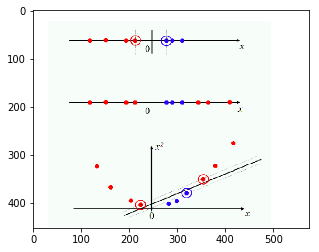

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/michaelbuchar/Desktop/Non-linear_SVM.png")
plt.imshow(image)
plt.show()

### 3) Linear SVM vs k-NN
- K-Nearest Neighbours is a popular unsupervised learning algorithm. Explain the difference between supervised and unsupervised learning?
- K-NN is an example of a lazy learning algorithm. Why is it called so. What could be a use case? Justify using a lazy learning algorithm in that case.
- Outline the main steps for the KNN algorithm. Use text, code, plots, diagrams, etc as necessary.  
- Plot a example dataset which works in an SVM classification and not k-NN classification. Repeat for the reverse scenario.

##### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
First question: there was a mix up as mentioned in the homework channel on Slack.
Lazy Learning:  K-NN does not learn a discriminative function from the training data but almost memorizes the training dataset instead and therefore it does not have a training phase. The prediction algorithm takes a very long and that's why it's called lazy.
This strategy is used for example in movie recommendations since they are always updated with new items. Learning the training data will not the best solution since it will be recently considered outdated. In conclusion, the lazy learning algorithm is useful for big and continuously changing datasets with comparatively few features/attributes. 
Mains steps for K-NN: 
Firstly, we need to get the training set and initialize our k value. Secondly, we iterate through all the data points and calculate the distance between test data and each row of the training data (Euclidean distance is the most popular method for this implementation). Thirdly, we sort the calculated distances in ascending order. Next, we get the top k rows from the sorted distances and lastly, we get the most frequent/predicted class of these rows and return this class.
In general, it is better to use K-NN with large datasets and SVM with smaller datasets because of the training sets.
This dataset is better for K-NNs:

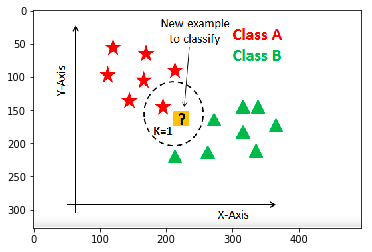

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/michaelbuchar/Desktop/K-NN_.png")
plt.imshow(image)
plt.show()

This dataset is better for SVMs using a non-linear kernel:

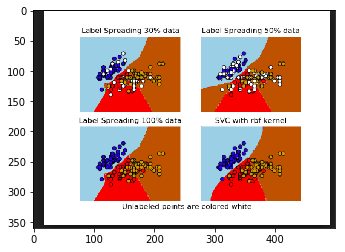

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("/Users/michaelbuchar/Desktop/SVM_.png")
plt.imshow(image)
plt.show()

If K-NN produces good results, then this suggests that the data is quite separable.
On the other hand, if K-NN does not produce good results, then this means that the metric vector we have chosen does not produce separable classes.

### 4) K-NN Implementation
- Implement the K-NN algorithm by hand (ie. Don't use the sklearn implementation).

In [14]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

# step 1: # EuclideanDistance function between two points/data
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x]) # distance between two points squared
    return np.sqrt(distance)


def knn(trainingSet, testInstance, k):
    distances = {} # setting two arrays for distances
    sort = {} # This one is sorted
    length = testInstance.shape[1] # defining a length for the Euclidean Algorithm
    
# step 2: 
    for x in range(len(trainingSet)): # calculating euclidean distance between each row of training data and test data
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]

# step 3:  
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) # sorting distances on the basis of distance
    neighbors = [] # a neighbors list  

# step 4:    
    for x in range(k): # getting the top k neighbors
        neighbors.append(sorted_d[x][0])

# step 5:
    classVotes = {}
    for x in range(len(neighbors)): # calculating the most frequent class
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes: 
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors) # returning the most frequent class


### 5) Ensemble Methods
- Explain bagging and boosting. Clearly illustrate the difference between these methods. When would you use either one?
- What is a decision tree? What is a random forest? Compare them and list 3 pros and cons of each?

#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
Ensemble learning - A technique were multiple decision tree classifiers with lower accuracy together form a strong decision tree with higher accuracy. 
Bagging - stands for "Bootstrap Aggregation." Firstly, we bootstrap the data (pick a random sample with replacement) and then a subset of features is selected. This subset creates a model with sample observations and features. The feature that gives the best split on the training data is selected, which is repeated many times. Lastly, the prediction is based on the aggregation of the predictions from all the models, hence the name "Bootstrap Aggregation."
Boosting - unlike bagging that ran each model independently, uses weighted averages to make weak learners a little stronger. The next model is based on the previous model, ie. the model that runs dictates what features should the next model focus on.
Both bagging and boosting decrease the variance of the single estimate because they combine multiple estimates from various models. If the single model has very low performance, it would be more suitable to use Boosting since it could generate a combined model with smaller errors. On the other hand, if there is an overfit to the difficulty on the model, then Bagging is the way to go.
Decision Tree - It answers sequential questions which send us down a certain route of the tree given the answer we inputted (going from the root to the leaves -- top to bottom). Advantages: 1. Very easy to interpret (see what's going on and which route we are taking). 2. Can handle both numerical and categorical data. 3. Performs well on large data and they are pretty fast. Disadvantages: 1. Building a decision tree is not as easy. 2. At each step, the algorithm chooses the best result, yet it doesn't take into account the global optimum. 3. Decision trees can be easily over-fitting if there are too many levels (the tree is too deep).
Random Forest - A random forest is a collection of decision trees that are copied into one final result. Advantages: 1. Ability to limit overfitting. 2. Training on different samples of the data. 3. Much more robust than a single decision tree. Cons: 1. More complex than single decision trees. 2. Not easily interpretable. 3. Not a state-of-the-art algorithm.

### 6) PCA vs Autoencoders
- Describe how PCA achieves dimensionality reduction. Outline the main steps of the algorithm
- What is the importance of eigenvectors and eigenvalues in the PCA algorithm above.
- When we compute the covariance matrix in PCA, we have to subtract the mean. Why do we do this?
- What is Autoencoder (compare it to PCA)? Why are autoencoders better in general.
- When is the reduced dimension of an encoder equivalent to that of a PCA

#### YOUR ANSWER HERE - YOUR MAY USE MARKDOWN, LATEX, CODE, DIAGRAMS, ETC
PCA - The simple idea behind it is to simply find a low-dimensional set of axes that summarizes our data. Simply the main steps of the algorithm: Firstly, we need to prepare the dataset and extract the class label. Secondly, we normalize the data and calculate the covariance matrix. Next, we find the eigenvalues and their corresponding eigenvectors and sort them. After that, we select the top k eigenvalues/eigenvectors and form the new dataset in reduced dimensions. Lastly, we could then plot the results to see how well our algorithm performed.
The eigenvectors represent the new set of axes of the principal component space and the eigenvalues represent the amount of variance that each eigenvector has. Therefore, in order to reduce the dimension of our dataset, we should choose eigenvectors that have more variance (summarize the data the most).
We subtract the mean from the covariance matrix so that we center our covariance matrix/data around the mean.
Autoencoder - It is able to perform linear as well as non-linear dimensionality reduction. Therefore, it can perform everything that the PCA can do but apply non-linear dimensionality reduction as well. Autoencoders learn data features for future tasks, have a hidden layer. The reduced dimension of an encoder is equivalent to that of a PCA when there is linear dimensionality reduction.

### 7) Implementation

In the 1980's', Alex 'Sandy' Pentland came up with 'EigenFaces'. A novel way for facial classification using dimensionality reduction. We are going to try replicate the experiment in this question. We have loaded the face dataset for you below. Here's some steps for you: 

- Use PCA to reduce its dimensionality.
- Use any algorithm to train a classifier for the dataset. You may use sklearn or pytorch. (Refer to PCA demo notebook for hints)
- (Optional) Use autoencoders for the dimensionality reduction, compare results to PCA. Any comments/conculsions?


In [25]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.decomposition import PCA

# loading the faces dataset
from sklearn.datasets import fetch_lfw_people

# uncomment below to load dataset(takes ~5 mins to load data)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# assigning features vectors
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


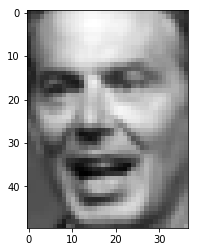

Size of each vector: (1850,)


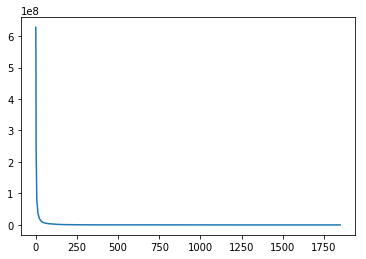

In [26]:
# plot an example image
plt.imshow(X[1].reshape(h,w), cmap = 'gray')
plt.show()

# size of each vector
print("Size of each vector: {0}".format(X[0].shape))


# centering the data and finding the eigenvalues of the covariance matrix
X_average_row = np.average(X, axis=0)
X_bar = X - X_average_row
sigma = X_bar.T.dot(X_bar)
eigenvalues, ___ = np.linalg.eig(sigma)
plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.show()


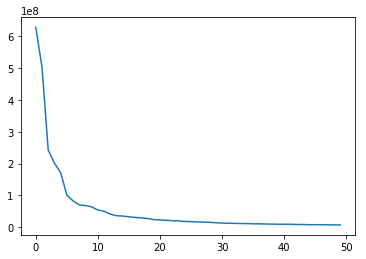

In [27]:
# to zoom in:
plt.plot(np.arange(50), eigenvalues[:50])
plt.show()

In [28]:
# dimensionality reduction (number of components = 50)
pca = PCA(n_components=50)
pca.fit(X)

X_pca = pca.transform(X)
print("Shape of data before PCA: {0}".format(X.shape))
print("Shape of data after PCA: {0}".format(X_pca.shape))

Shape of data before PCA: (1288, 1850)
Shape of data after PCA: (1288, 50)


Shape of data after reconstruction: (1288, 1850)


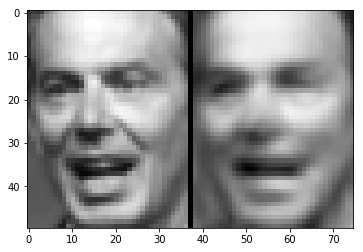

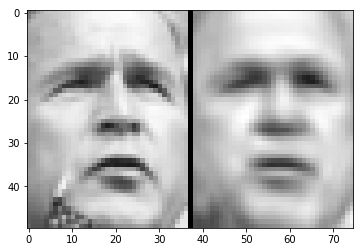

In [29]:
X_reconstructed = pca.inverse_transform(X_pca)
print("Shape of data after reconstruction: {0}".format(X_reconstructed.shape))
original = X[1].reshape(h,w)
reconstructed = X_reconstructed[1].reshape(h,w)
divider = np.ones((original.shape[0], 1))
plt.imshow(np.concatenate((original, divider, reconstructed), axis=1), cmap='gray')
plt.show()

original = X[2].reshape(h,w)
reconstructed = X_reconstructed[2].reshape(h,w)
divider = np.ones((original.shape[0], 1))
plt.imshow(np.concatenate((original, divider, reconstructed), axis=1), cmap='gray')
plt.show()


### NUMBER OF COMPONENTS USED: 50

## Bonus Challenge! (Optional)

This will take some time. However, trust that it is a rewarding experience. There will be a prize for whoever implements it correctly!

- Implement a feed forward neural network with back proprogation using stochastic gradient descent by hand. 
- Use any dataset you want and test the accuracy

In [60]:
### your code below ###

